In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [2]:
df = pd.read_csv('../data/loans_2007.csv')

/Users/torben/opt/anaconda3/envs/nf2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(42538, 52)

In [5]:
for i in df.columns:
    print(i)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
last_credit_pull_d
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
pub_rec_bankruptcies
tax_liens


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
id                            42538 non-null object
member_id                     42535 non-null float64
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
p

In [7]:
pd.options.display.max_columns = None

In [8]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [9]:
df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,42538,4.253500e+04,42535.000000,42535.000000,42535.000000,42535,42535,42535.000000,42535,42535,39909,41423,42535,4.253100e+04,42535,42535,42535,42535,42535,42522,42535,42535,42535.000000,42506.000000,42506,42506.000000,42506.000000,42506.000000,4.253500e+04,42445,42506.000000,42535,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42452,42535.000000,42531,42390.0,42535.0,42535,42506.000000,42390.0,42506.000000,41170.000000,42430.000000
unique,42538,NaN,NaN,NaN,NaN,2,394,NaN,7,35,30658,11,5,NaN,3,55,9,2,14,21264,837,50,NaN,NaN,530,NaN,NaN,NaN,NaN,1119,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103,NaN,108,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
top,299891,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-2011,Fully Paid,n,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Oct-1999,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jun-2016,NaN,Jun-2016,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,31534,970,NaN,12389,2997,139,9369,20181,NaN,18758,2267,33136,42534,19776,2259,649,7429,NaN,NaN,393,NaN,NaN,NaN,NaN,1070,NaN,42535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1143,NaN,12492,NaN,NaN,42535,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.257026e+05,11089.722581,10821.585753,10139.830603,NaN,NaN,322.623063,NaN,NaN,NaN,NaN,NaN,6.913656e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.373043,0.152449,NaN,1.081424,9.343951,0.058156,1.429786e+04,NaN,22.124406,NaN,37.990055,37.824818,11978.615270,11271.701267,9639.037232,2238.306772,1.510637,99.760718,13.858267,NaN,2610.756511,NaN,0.0,1.0,NaN,0.000094,0.0,0.143039,0.045227,0.000024
std,NaN,2.795409e+05,7410.938391,7146.914675,7131.686446,NaN,NaN,208.927216,NaN,NaN,NaN,NaN,NaN,6.409635e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.726315,0.512406,NaN,1.527455,4.496274,0.245713,2.201844e+04,NaN,11.592811,NaN,303.208301,302.210835,9014.845374,8956.617809,7051.029097,2579.814807,7.812629,716.220266,159.360372,NaN,4385.636417,NaN,0.0,0.0,NaN,0.009700,0.0,29.359579,0.208737,0.004855
min,NaN,7.047300e+04,500.000000,500.000000,0.000000,NaN,NaN,15.670000,NaN,NaN,NaN,NaN,NaN,1.896000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,0.000000e+00,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.0,1.0,NaN,0.000000,0.0,0.000000,0.000000,0.000000
25%,NaN,6.384795e+05,5200.000000,5000.000000,4950.000000,NaN,NaN,165.520000,NaN,NaN,NaN,NaN,NaN,4.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.200000,0.000000,NaN,0.000000,6.000000,0.000000,3.635000e+03,NaN,13.000000,NaN,0.000000,0.000000,5460.841745,4790.805000,4400.000000,657.100000,0.000000,0.000000,0.000000,NaN,211.460000,NaN,0.0,1.0,NaN,0.000000,0.0,0.000000,0.000000,0.000000
50%,NaN,8.241780e+05,9700.000000,9600.000000,8500.000000,NaN,NaN,277.690000,NaN,NaN,NaN,NaN,NaN,5.900000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.470000,0.000000,NaN,1.000000,9.000000,0.000000,8.821000e+03,NaN,20.000000,NaN,0.000000,0.000000,9676.336996,8949.130000,8000.000000,1339.160000,0.000000,0.000000,0.000000,NaN,526.150000,NaN,0.0,1.0,NaN,0.000000,0.0,0.000000,0.000000,0.000000
75%,NaN,1.033946e+06,15000.000000,15000.000000,14000.000000,NaN,NaN,428.180000,NaN,NaN,NaN,NaN,NaN,8.250000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.680000,0.

In [10]:
df.installment.describe()

count    42535.000000
mean       322.623063
std        208.927216
min         15.670000
25%        165.520000
50%        277.690000
75%        428.180000
max       1305.190000
Name: installment, dtype: float64

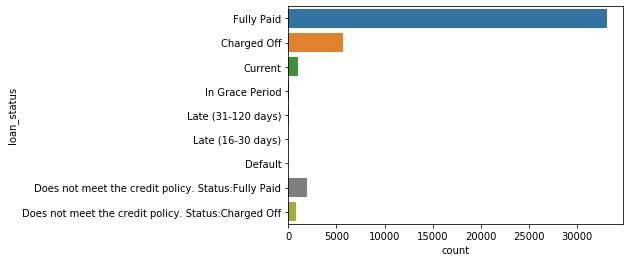

In [11]:
sns.countplot(y='loan_status', data=df)

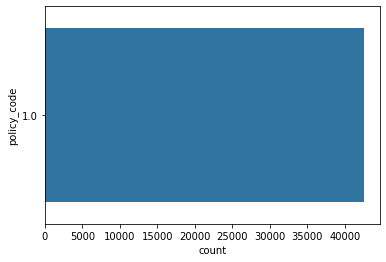

In [12]:
sns.countplot(y='policy_code', data=df)

In [13]:
df.loan_status.value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

In [14]:
df.term.value_counts()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

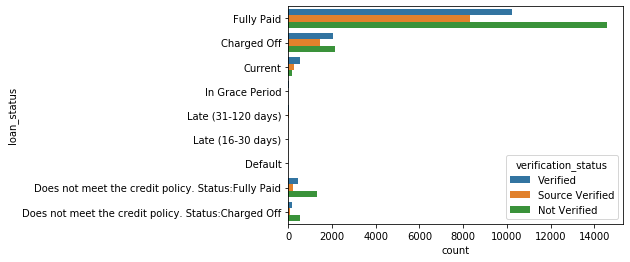

In [15]:
sns.countplot(y='loan_status',data=df,hue='verification_status')

In [16]:
df.title.value_counts()

Debt Consolidation                          2259
Debt Consolidation Loan                     1760
Personal Loan                                708
Consolidation                                547
debt consolidation                           532
Home Improvement                             373
Credit Card Consolidation                    370
Debt consolidation                           347
Small Business Loan                          333
Personal                                     330
Credit Card Loan                             323
personal loan                                266
Consolidation Loan                           264
Home Improvement Loan                        255
personal                                     247
Loan                                         218
consolidation                                217
Wedding Loan                                 217
Car Loan                                     206
Other Loan                                   192
Credit Card Payoff  

In [17]:
df.issue_d.value_counts()

Dec-2011    2267
Nov-2011    2232
Oct-2011    2118
Sep-2011    2067
Aug-2011    1934
Jul-2011    1875
Jun-2011    1835
May-2011    1704
Apr-2011    1563
Mar-2011    1448
Jan-2011    1380
Dec-2010    1335
Feb-2011    1298
Oct-2010    1232
Nov-2010    1224
Jul-2010    1204
Sep-2010    1189
Aug-2010    1175
Jun-2010    1105
May-2010     989
Apr-2010     912
Mar-2010     828
Feb-2010     682
Jan-2010     662
Nov-2009     662
Dec-2009     658
Oct-2009     604
Sep-2009     507
Aug-2009     446
Jul-2009     411
Jun-2009     406
Mar-2008     402
May-2009     359
Apr-2009     333
Mar-2009     324
Feb-2008     306
Jan-2008     305
Feb-2009     302
Jan-2009     269
Apr-2008     259
Dec-2008     253
Nov-2008     209
Dec-2007     172
Jul-2008     141
Jun-2008     124
Oct-2008     122
May-2008     115
Nov-2007     112
Oct-2007     105
Aug-2008     100
Aug-2007      74
Jul-2007      63
Sep-2008      57
Sep-2007      53
Jun-2007      24
Name: issue_d, dtype: int64

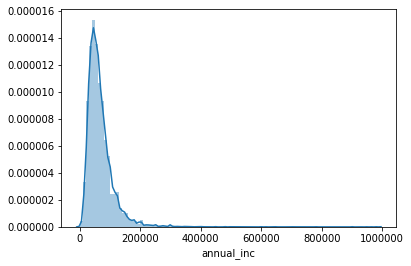

In [18]:
sns.distplot(df.annual_inc[df.annual_inc<1000000],bins=100)

In [19]:
df.query('annual_inc > 1000000')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
7268,884755,1100269.0,12025.0,12025.0,12000.000000,36 months,14.27%,412.57,C,C2,NYCDOE,10+ years,RENT,1782000.0,Not Verified,Sep-2011,Fully Paid,n,debt_consolidation,LC2,108xx,NY,1.31,0.0,Dec-1987,0.0,9.0,0.0,49208.0,85.7%,30.0,f,0.0,0.0,14847.436821,14816.57,12025.0,2822.44,0.0,0.00,0.000,Sep-2014,842.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
10650,830027,1039166.0,15775.0,15775.0,15750.000000,60 months,12.99%,358.85,C,C1,Stryker Instruments,2 years,MORTGAGE,1250000.0,Verified,Jul-2011,Charged Off,n,debt_consolidation,The mama of all debt consolidation loans,490xx,MI,21.81,0.0,May-1997,0.0,10.0,0.0,48258.0,83.2%,28.0,f,0.0,0.0,18301.350000,18272.56,12799.7,5481.50,0.0,20.15,3.627,Oct-2015,358.85,May-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
21477,643368,823374.0,10000.0,10000.0,9500.000000,36 months,6.54%,306.68,A,A4,Convent of the Sacred Heart,10+ years,OWN,1200000.0,Verified,Jan-2011,Fully Paid,n,debt_consolidation,Paul's Loan,068xx,CT,1.46,0.0,Jun-1994,0.0,6.0,0.0,75706.0,49.1%,13.0,f,0.0,0.0,11008.565027,10458.14,10000.0,1008.57,0.0,0.00,0.000,Oct-2013,222.14,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
23618,611872,784585.0,1500.0,1500.0,1500.000000,36 months,6.17%,45.75,A,A3,Montgomery ISD,5 years,MORTGAGE,1900000.0,Source Verified,Nov-2010,Fully Paid,n,credit_card,Credit Card Refinancing,773xx,TX,0.57,0.0,Jun-1981,2.0,17.0,0.0,17396.0,59.6%,36.0,f,0.0,0.0,1562.352995,1562.35,1500.0,62.35,0.0,0.00,0.000,Aug-2011,1197.34,Feb-2012,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
24233,603818,774761.0,25000.0,25000.0,24493.463528,60 months,15.20%,597.38,D,D4,Avis Budget Group,10+ years,RENT,1200000.0,Source Verified,Nov-2010,Fully Paid,n,debt_consolidation,Debt Consolidation 1,700xx,LA,0.41,0.0,Aug-1998,1.0,4.0,0.0,11168.0,69.8%,12.0,f,0.0,0.0,33125.070568,32082.19,25000.0,8125.07,0.0,0.00,0.000,Jul-2013,14624.78,Jul-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
25831,572697,736657.0,12000.0,12000.0,12000.000000,36 months,7.51%,373.33,A,A4,TelSource Corp,1 year,MORTGAGE,1200000.0,Not Verified,Sep-2010,Fully Paid,n,debt_consolidation,Pay off Chase Mastercard + Equipment,070xx,NJ,9.17,0.0,Oct-1989,2.0,12.0,0.0,26684.0,51.9%,26.0,f,0.0,0.0,13440.094771,13440.09,12000.0,1440.09,0.0,0.00,0.000,Oct-2013,407.64,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
27633,551367,710553.0,5600.0,5600.0,5600.000000,60 months,13.61%,129.18,C,C2,Dept of army,10+ years,MORTGAGE,1176000.0,Source Verified,Jul-2010,Fully Paid,n,other,Help political campaign and pay bills,206xx,MD,1.22,1.0,Mar-1997,0.0,6.0,0.0,11753.0,73.5%,25.0,f,0.0,0.0,7750.179998,7750.18,5600.0,2150.18,0.0,0.00,0.000,Aug-2015,137.79,Aug-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
28975,528009,682915.0,4500.0,4500.0,4500.000000,60 months,7.88%,90.99,A,A5,St. John Lutheran Church,8 years,MORTGAGE,1080000.0,Source Verified,Jun-2010,Fully Paid,n,major_purchase,Shadow Motorcycle,217xx,MD,0.57,0.0,Nov-1983,0.0,7.0,0.0,46337.0,1.9%,20.0,f,0.0,0.0,5262.056984,5262.06,4500.0,762.06,0.0,0.00,0.000,May-2013,2269.27,May-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
29708,519954,672152.0,25000.0,15500.0,11430.000817,60 months,10.62%,334.08,B,B3,Lea Regional Hospital/Pecos Valley,3 years,MORTGAGE,3900000.0,Not Verified,Jun-2010,Fully Paid,n,home_improvement,Home improvement loan,882xx,NM,0.20,0.0,Sep-1999,3.0,12.0,0.0,3270.0,10.2%,32.0,f

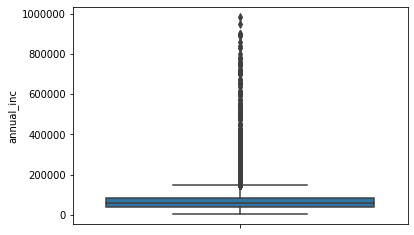

In [20]:
sns.boxplot(y=df.annual_inc[df.annual_inc<1000000])

In [21]:
df.annual_inc.describe().round(2)

count      42531.00
mean       69136.56
std        64096.35
min         1896.00
25%        40000.00
50%        59000.00
75%        82500.00
max      6000000.00
Name: annual_inc, dtype: float64

In [22]:
df.application_type.value_counts()

INDIVIDUAL    42535
Name: application_type, dtype: int64

In [23]:
df.chargeoff_within_12_mths.nunique()

1

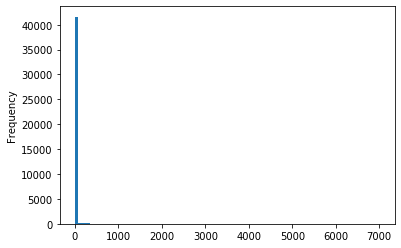

In [24]:
df.collection_recovery_fee.plot.hist(bins=100)

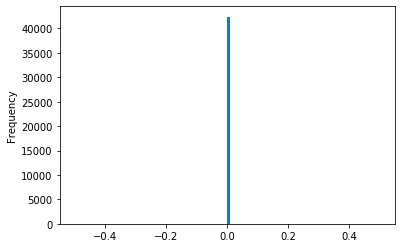

In [25]:
df.collections_12_mths_ex_med.plot.hist(bins=100)

In [26]:
df.collections_12_mths_ex_med.isna().value_counts()

False    42390
True       148
Name: collections_12_mths_ex_med, dtype: int64

In [27]:
sns.barplot(y=df.dti.value_unts(),x=df.dti.unique(),hue=df.loan_status)

AttributeError: 'Series' object has no attribute 'value_unts'

In [28]:
df.nunique()

id                            42538
member_id                     42535
loan_amnt                       898
funded_amnt                    1051
funded_amnt_inv                9246
term                              2
int_rate                        394
installment                   16459
grade                             7
sub_grade                        35
emp_title                     30658
emp_length                       11
home_ownership                    5
annual_inc                     5597
verification_status               3
issue_d                          55
loan_status                       9
pymnt_plan                        2
purpose                          14
title                         21264
zip_code                        837
addr_state                       50
dti                            2894
delinq_2yrs                      12
earliest_cr_line                530
inq_last_6mths                   28
open_acc                         44
pub_rec                     

In [29]:
df.initial_list_status.value_counts()

f    42535
Name: initial_list_status, dtype: int64

In [30]:
df.acc_now_delinq.value_counts()

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64

In [31]:
df.delinq_amnt.value_counts()

0.0       42504
6053.0        1
27.0          1
Name: delinq_amnt, dtype: int64

In [32]:
df.pub_rec_bankruptcies.value_counts()
# could be hanged to yes=1 and no=0

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [33]:
df.tax_liens.value_counts()

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

In [34]:
df.pymnt_plan.value_counts()

n    42534
y        1
Name: pymnt_plan, dtype: int64

In [35]:
df.open_acc.value_counts()

7.0     4252
8.0     4176
6.0     4172
9.0     3922
10.0    3386
5.0     3368
11.0    2944
4.0     2508
12.0    2398
13.0    2060
3.0     1608
14.0    1597
15.0    1290
16.0    1022
17.0     812
2.0      692
18.0     588
19.0     442
20.0     335
21.0     276
22.0     170
23.0     121
24.0      87
25.0      63
26.0      40
1.0       39
28.0      29
27.0      29
30.0      17
29.0      16
31.0      13
34.0       8
32.0       6
33.0       5
35.0       4
38.0       2
36.0       2
41.0       1
46.0       1
39.0       1
47.0       1
44.0       1
37.0       1
42.0       1
Name: open_acc, dtype: int64

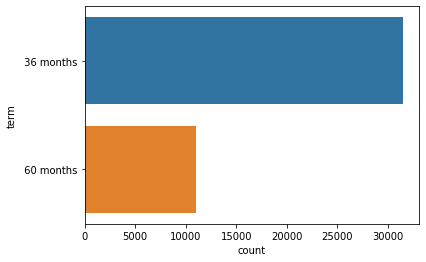

In [36]:
sns.countplot(y='term', data=df)

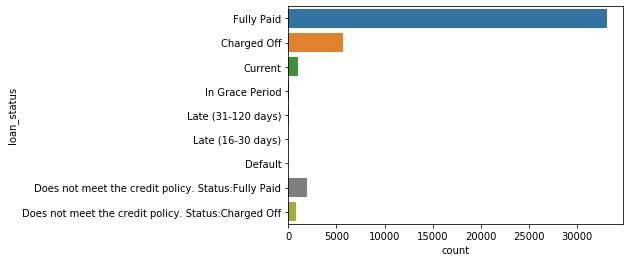

In [37]:
sns.countplot(y='loan_status', data=df)

In [38]:
df.addr_state.value_counts()

CA    7429
NY    4065
FL    3104
TX    2915
NJ    1988
IL    1672
PA    1651
GA    1503
VA    1487
MA    1438
OH    1329
MD    1125
AZ     933
WA     888
CO     857
NC     830
CT     816
MI     796
MO     765
MN     652
NV     527
WI     516
SC     489
AL     484
OR     468
LA     461
KY     359
OK     317
KS     298
UT     278
AR     261
DC     224
RI     208
NM     205
NH     188
WV     187
HI     181
DE     136
MT      96
WY      87
AK      86
SD      67
VT      57
TN      32
MS      26
IN      19
IA      12
NE      11
ID       9
ME       3
Name: addr_state, dtype: int64

In [39]:
df.zip_code.nunique()

837

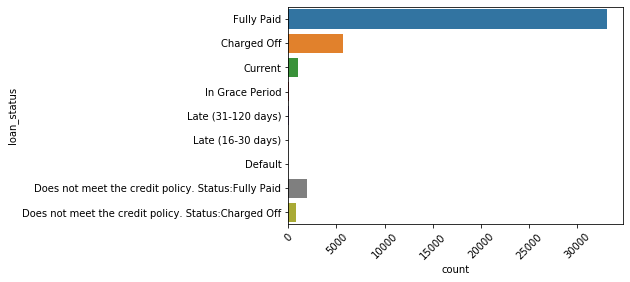

In [40]:
sns.countplot(y='loan_status',data=df)
plt.xticks(rotation=45);

In [41]:
df.loan_status.value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

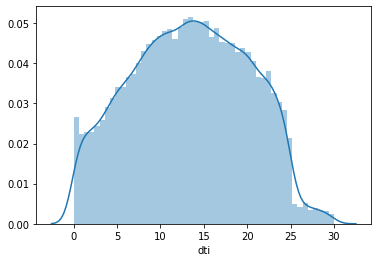

In [42]:
sns.distplot(df.dti)

In [43]:
df.annual_inc.describe().round()

count      42531.0
mean       69137.0
std        64096.0
min         1896.0
25%        40000.0
50%        59000.0
75%        82500.0
max      6000000.0
Name: annual_inc, dtype: float64

In [48]:
df_clean = pd.read_pickle('../data/clean_date_01.pkl')

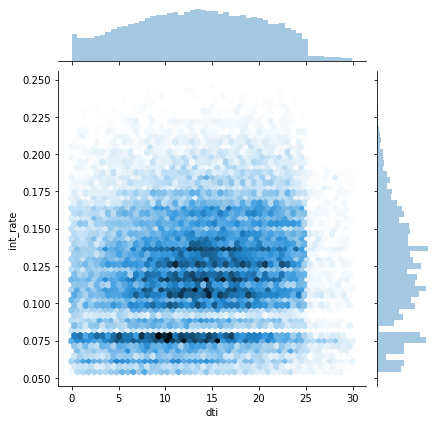

In [49]:
sns.jointplot(data=df_clean, x='dti', y='int_rate', kind='hex', joint_kws=dict(gridsize=50));

In [51]:
def plot_distribution(dataset, hue=None,cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset,hue=hue)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column],kde=False)
            #g = sns.
            plt.xticks(rotation=25)

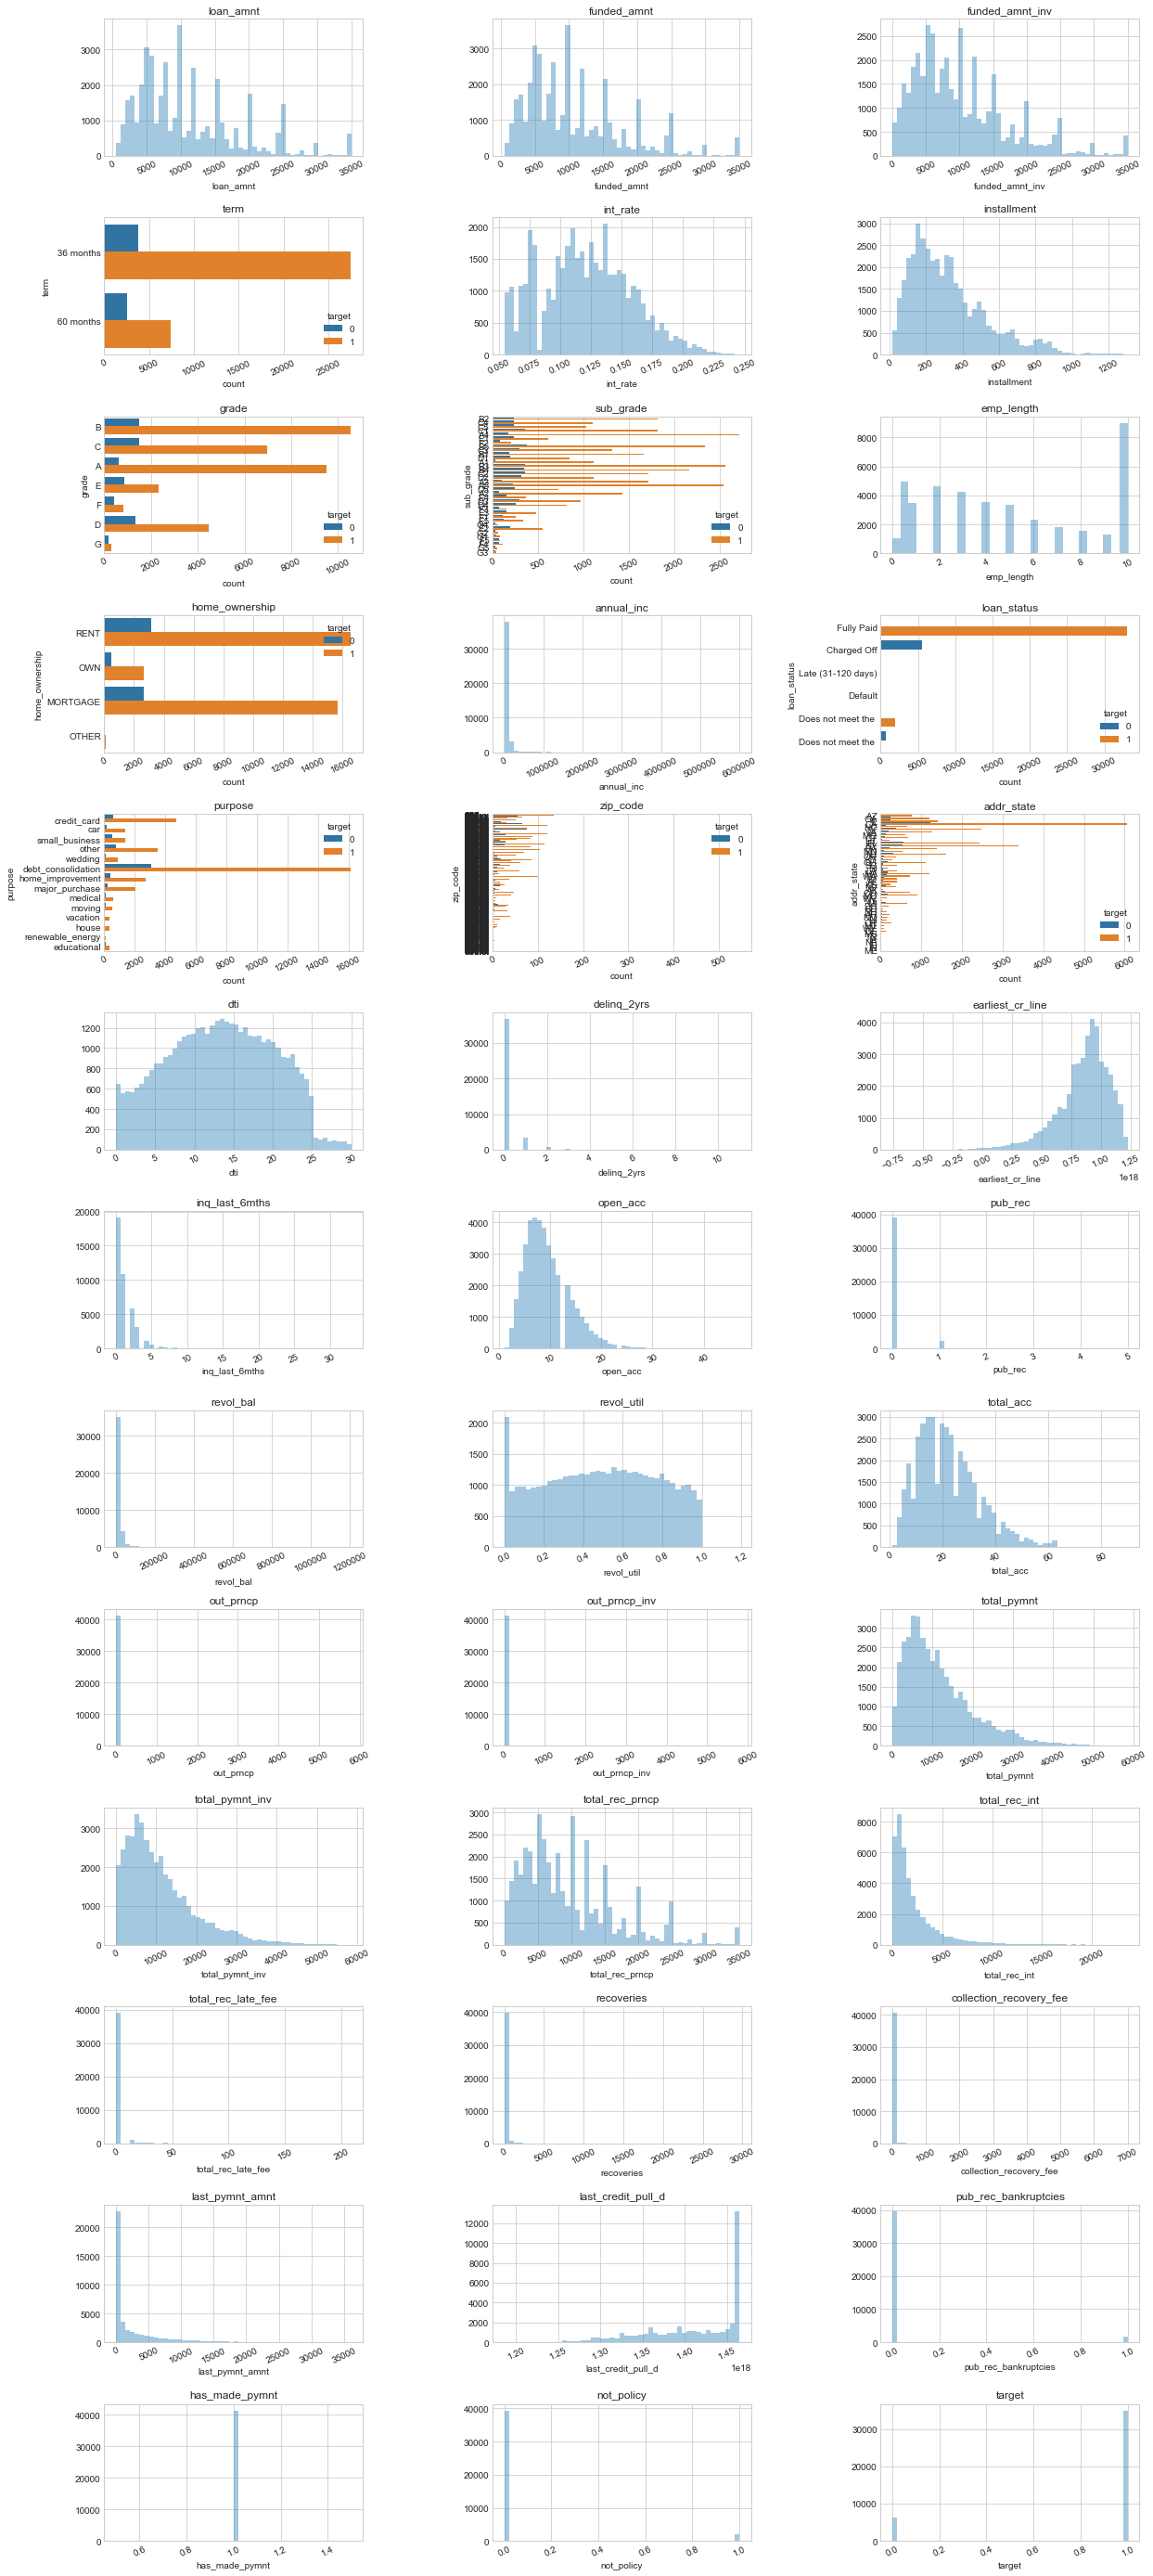

In [52]:
plot_distribution(df_clean,hue='target', cols=3, width=20, height=50, hspace=0.45, wspace=0.5)

In [53]:
# We'll inspect each feature individually, and do the following:
# 
# Drop the feature if it is not useful for predicting the loan status.
# View summary statistics and visualize the data, plotting against the loan status.
# Modify the feature to make it useful for modeling, if necessary.

In [54]:
df_clean.target.value_counts()

1    34969
0     6371
Name: target, dtype: int64

In [92]:
df_clean.groupby('grade').target.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,10113.0,0.94,0.24,0.0,1.0,1.0,1.0,1.0
B,12050.0,0.87,0.33,0.0,1.0,1.0,1.0,1.0
C,8473.0,0.82,0.38,0.0,1.0,1.0,1.0,1.0
D,5786.0,0.77,0.42,0.0,1.0,1.0,1.0,1.0
E,3210.0,0.73,0.44,0.0,0.0,1.0,1.0,1.0
F,1222.0,0.67,0.47,0.0,0.0,1.0,1.0,1.0
G,486.0,0.65,0.48,0.0,0.0,1.0,1.0,1.0


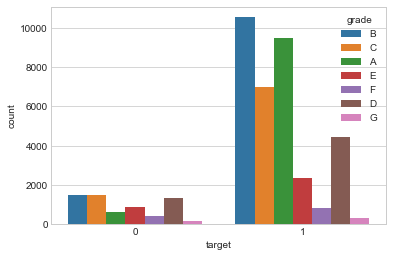

In [56]:
sns.countplot(x='target',data=df_clean, hue='grade')

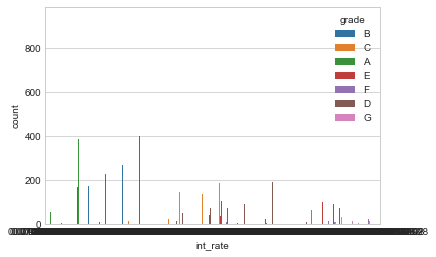

In [57]:
sns.countplot(x='int_rate', hue='grade',data=df_clean)

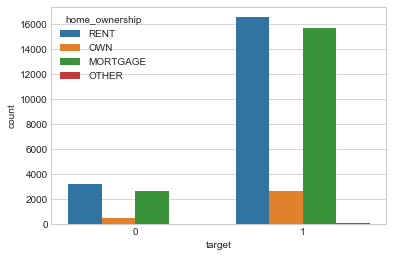

In [68]:
sns.countplot(hue='home_ownership',data=df_clean, x='target')

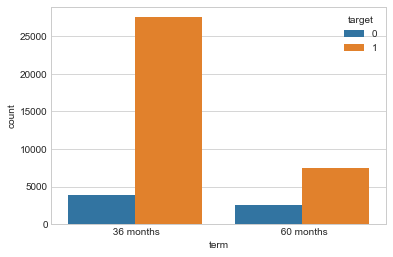

In [70]:
sns.countplot(hue='target',data=df_clean, x='term')

In [72]:
df_clean.groupby('term')['target'].describe().T

term,36 months,60 months
count,31335.000000,10005.000000
mean,0.877741,0.746127
std,0.327590,0.435248
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [58]:
df_clean.open_acc.describe().round(2)

count    41340.00
mean         9.34
std          4.50
min          1.00
25%          6.00
50%          9.00
75%         12.00
max         47.00
Name: open_acc, dtype: float64

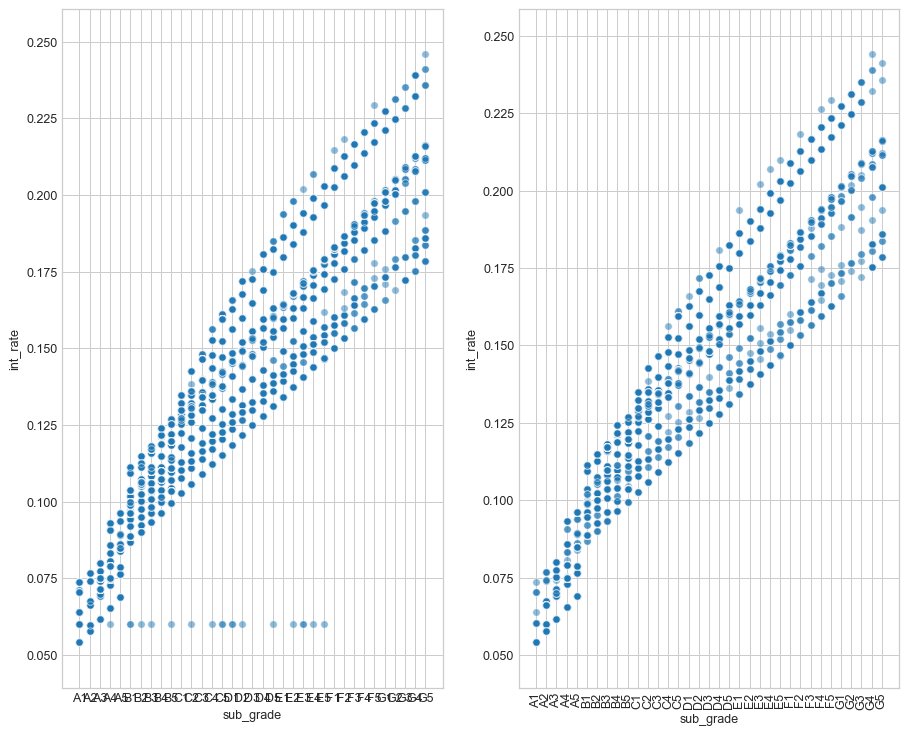

In [59]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,10), dpi=90)
g= sns.scatterplot(x='sub_grade',y='int_rate',data=df_clean.query('target==1').sort_values('sub_grade'),alpha=.5,ax=ax1)
g= sns.scatterplot(x='sub_grade',y='int_rate',data=df_clean.query('target==0').sort_values('sub_grade'),alpha=.5,ax=ax2)
plt.xticks(rotation=90);

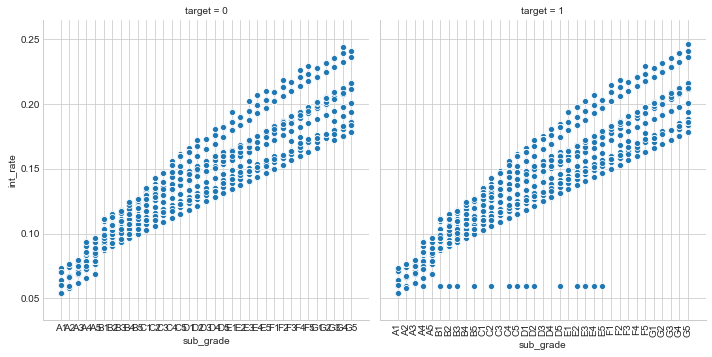

In [60]:
g= sns.relplot(x='sub_grade',y='int_rate',data=df_clean.sort_values('sub_grade'),col='target')
plt.xticks(rotation=90);

In [61]:
df_clean.query('grade!="A" and int_rate < 0.075').T

,2033,2715,13934,15669,16029,17018,17200,21984,25539,28522,31205,32815,34311,38027,38409,38781,39365,41568
loan_amnt,7000,10600,3150,6400,10400,6400,7600,20000,5000,8000,6000,12500,6250,6400,7000,7500,15000,6000
funded_amnt,7000,10600,3150,6400,10400,6400,7600,20000,5000,8000,6000,12500,6250,6400,7000,7500,15000,6000
funded_amnt_inv,7000,10550,3150,6400,10400,6400,7600,19868.8,5000,8000,6000,11600,6250,4082.3,3473.86,300,4575,0
term,36 months,60 months,36 months,60 months,60 months,60 months,36 months,60 months,36 months,60 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months
int_rate,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
installment,217.88,248.13,95.83,132.64,218.99,123.73,231.21,453.75,152.11,154.66,182.53,380.27,190.14,194.7,216.38,231.03,467.45,184.28
grade,B,C,B,E,E,D,B,E,E,D,C,D,B,B,C,D,C,E
sub_grade,B5,C2,B2,E3,E3,D5,B1,E5,E4,D2,C5,D1,B3,B1,C5,D1,C4,E2
emp_length,2,10,4,2,5,3,8,1,10,4,6,6,2,2,2,8,5,0.5
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,RENT


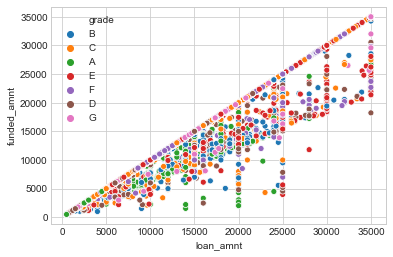

In [62]:
sns.scatterplot(y='funded_amnt',x='loan_amnt',data=df_clean,hue='grade')

In [146]:
loan_grade = ['target', 'grade']
cross_u = pd.crosstab(df_clean[loan_grade[0]], df_clean[loan_grade[1]], normalize='columns')
cross_u

grade,A,B,C,D,E,F,G
target,,,,,,,
0,0.06022,0.125394,0.175971,0.227791,0.271028,0.330606,0.345679
1,0.93978,0.874606,0.824029,0.772209,0.728972,0.669394,0.654321


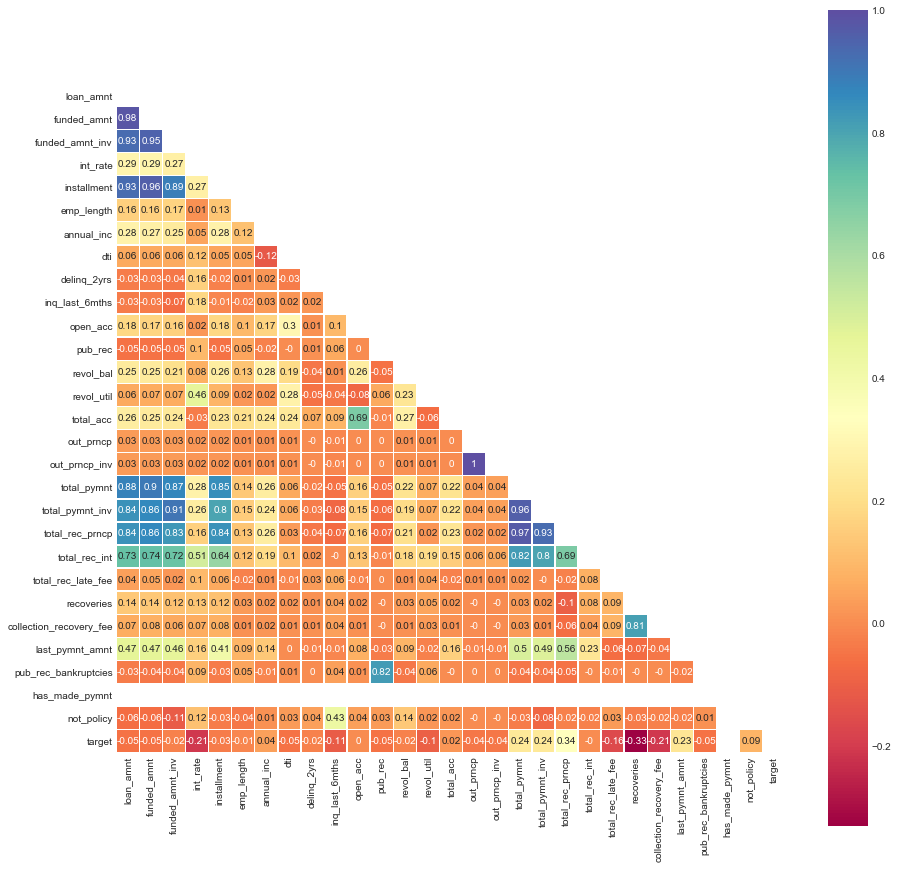

In [80]:
_,ax=plt.subplots(figsize=(15,15))
sns.heatmap(round(df_clean.corr(),2)
            ,annot=True
            ,square=True
            ,mask=np.triu(df_clean.corr())
            ,cmap='Spectral'
            ,linewidth=.5);

In [88]:
df_test=df_clean.drop(['total_pymnt','total_pymnt_inv','total_rec_prncp', 'installment'
                       ,'funded_amnt_inv','has_made_pymnt','total_rec_int','out_prncp_inv'],axis=1)

In [89]:
df_test.shape

(41340, 31)

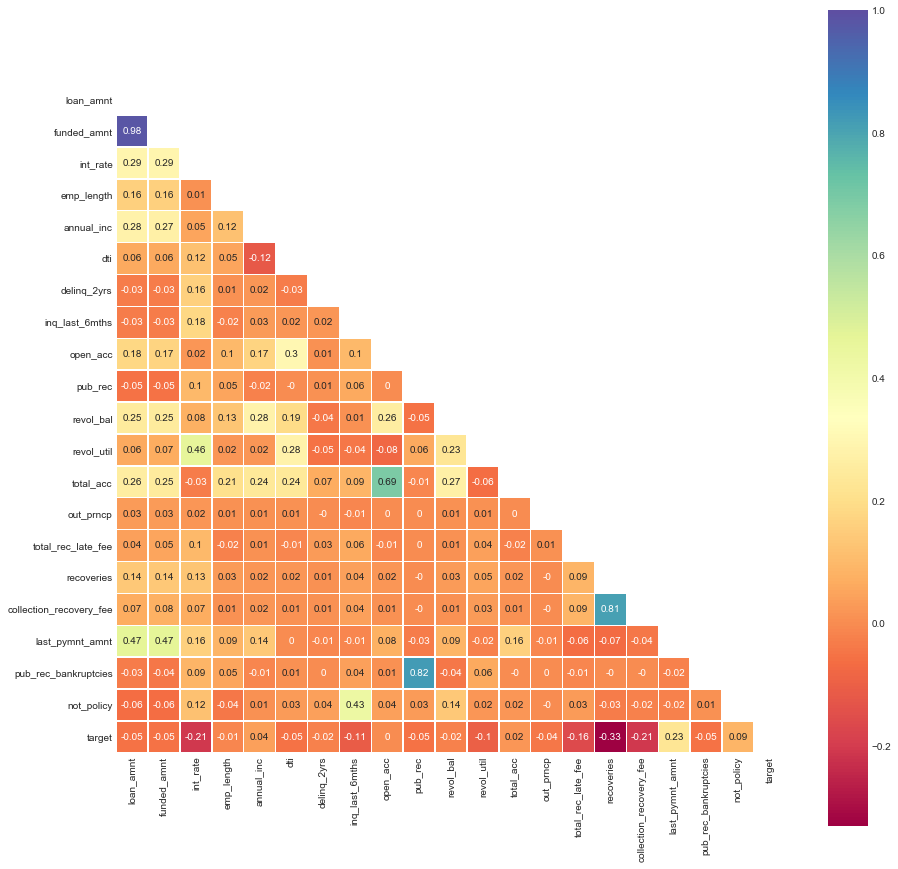

In [90]:
_,ax=plt.subplots(figsize=(15,15))
sns.heatmap(round(df_test.corr(),2)
            ,annot=True
            ,square=True
            ,mask=np.triu(df_test.corr())
            ,cmap='Spectral'
            ,linewidth=.5);

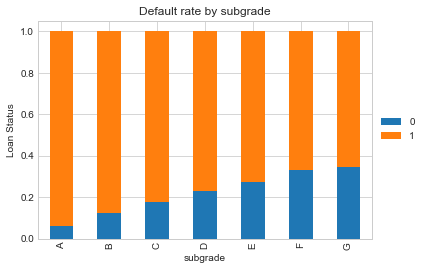

In [114]:
loan_stats = pd.crosstab(df_clean.grade, df_clean.target)
loan_stats = loan_stats.div(loan_stats.sum(1).astype(float),axis=0)
loan_stats.plot(kind='bar', stacked=True, title='Default rate by subgrade')
plt.xlabel('subgrade')
plt.ylabel('Loan Status')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

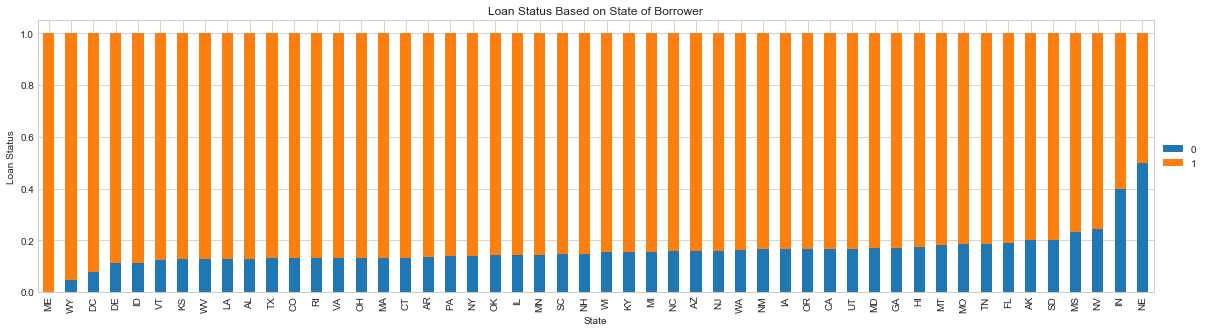

In [108]:
state = pd.crosstab(df_clean.addr_state , df_clean.target)
state = state.div(state.sum(1).astype(float), axis=0).sort_values(0)
state.plot(kind='bar', stacked=True, title='Loan Status Based on State of Borrower', figsize=(20,5))
plt.xlabel('State')
plt.ylabel('Loan Status')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

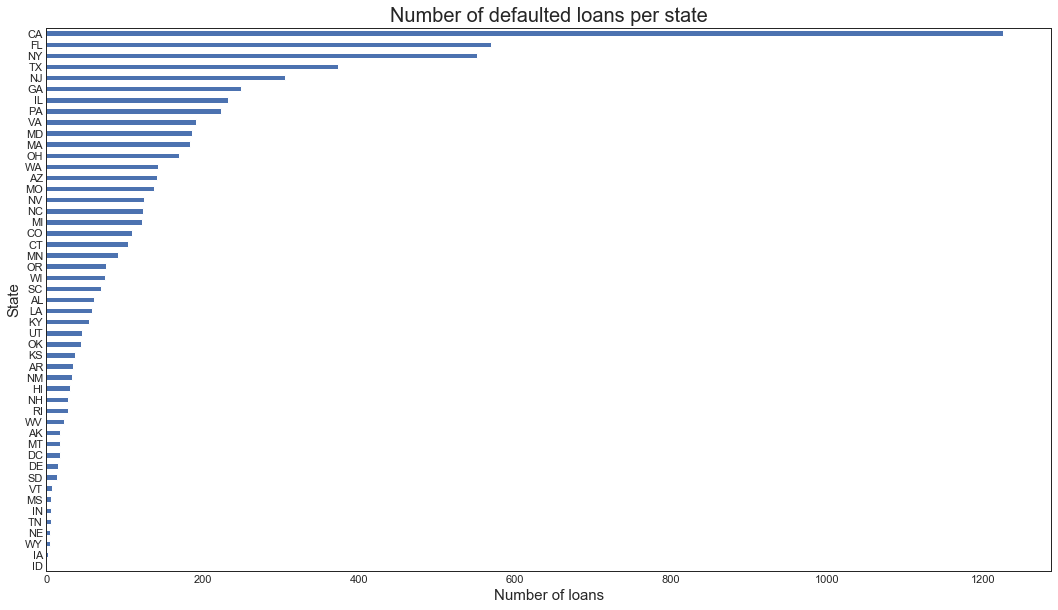

In [143]:
fig = plt.figure(figsize=(18,10))
df_clean[df_clean['target']==0].groupby('addr_state')['target'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

In [115]:
df_clean.addr_state.value_counts()

CA    7283
NY    3941
FL    3004
TX    2848
NJ    1924
IL    1630
PA    1603
GA    1458
VA    1453
MA    1375
OH    1281
MD    1095
AZ     901
WA     868
CO     831
NC     788
MI     786
CT     784
MO     747
MN     641
NV     511
WI     488
SC     479
AL     469
LA     454
OR     453
KY     346
OK     308
KS     285
UT     273
AR     253
DC     219
RI     205
NM     199
WV     182
NH     182
HI     173
DE     135
MT      94
AK      84
WY      83
SD      64
VT      56
TN      32
MS      26
IN      15
IA      12
ID       9
NE       8
ME       2
Name: addr_state, dtype: int64

In [122]:
# make general plots to examine each feature
def plot_var(df,col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='target', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = df.groupby(col_name)['target'].value_counts(normalize=True)[:,0]
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'target', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='target', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

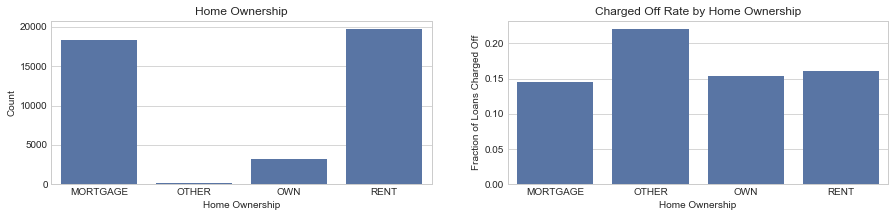

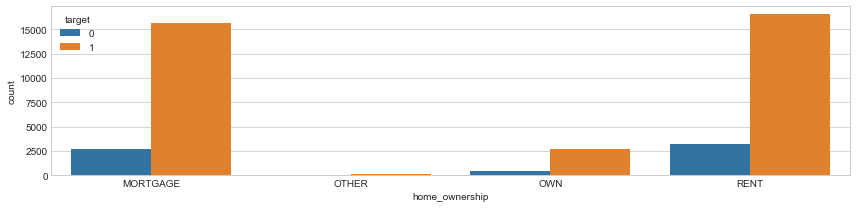

In [123]:
plot_var(df_clean, 'home_ownership', 'Home Ownership', continuous=False)

In [130]:
print('Default rate: ',df_clean.query('target==0').target.count()/df_clean.target.count())

Default rate:  0.15411223996129655
